<a href="https://colab.research.google.com/github/DrKenReid/Introductory-Data-Science/blob/main/Day_2_Lab_1_Multi_Layer_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On Exercise: Multi-layer Perceptron (MLP)

## Problem/dataset Description:
For this hands-on exercise, we will work with the MNIST digits dataset. The data consists of images of digits and the classification task is to classify the digits. We will use a simple MLP for this task and will play around with the number of hidden layers, choice of activation function, and choice of optimization algorithm.

## Preparing the datasets

We use the PyTorch library to build and train neural networks.

### Introduction to PyTorch and Alternatives

**Q: What is PyTorch?**
- **A: PyTorch is an open-source machine learning library for Python, used for applications such as deep learning and neural networks.**

**Q: How does PyTorch compare to alternatives like TensorFlow?**
- **A: PyTorch is known for its dynamic computational graph, which is intuitive and flexible for developers, while TensorFlow uses static graphs that can be optimized for performance.**

**Q: Why would one choose to learn PyTorch or TensorFlow for research?**
- **A: PyTorch is often chosen for research due to its intuitive and flexible dynamic computational graph, which allows for easy experimentation and debugging. TensorFlow, with its static graph, is preferred for production environments where performance and deployment are critical.**


### Code Explanation and Q&A

1. **Q: What is `torch` used for?**
   - **A: It's the core library of PyTorch, providing support for tensors and other basic operations.**

2. **Q: What does `torch.nn` contain?**
   - **A: It contains modules and classes to build neural networks.**

3. **Q: What is `torch.optim` used for?**
   - **A: It provides optimization algorithms for training models, such as SGD and Adam.**

4. **Q: What is `DataLoader` used for in PyTorch?**
   - **A: It loads data in batches and provides various utilities for data manipulation.**

5. **Q: What does `datasets` from `torchvision` provide?**
   - **A: It provides access to popular datasets like MNIST, CIFAR-10, and ImageNet.**

6. **Q: Why do we use `transforms` in `torchvision`?**
   - **A: To apply data transformations such as normalization and data augmentation.**

7. **Q: What is `accuracy_score` from `sklearn.metrics` used for?**
   - **A: To calculate the accuracy of the model's predictions.**

8. **Q: What is a tensor in PyTorch?**
   - **A: A tensor is a multi-dimensional array used for storing data in PyTorch.**

9. **Q: Why are optimization algorithms important in training neural networks?**
   - **A: They adjust the model parameters to minimize the loss function and improve the model's performance.**

10. **Q: What are some common data transformations applied to datasets?**
    - **A: Converting images to tensors and normalizing the pixel values.**

11. **Q: How does `torch.optim.SGD` differ from `torch.optim.Adam`?**
    - **A: SGD updates parameters with a constant learning rate, while Adam adjusts the learning rate based on past gradients.**

12. **Q: Why is it useful to use `accuracy_score` from sklearn?**
    - **A: It provides an easy way to evaluate the performance of a model on a classification task.**

13. **Q: How does PyTorch's dynamic computational graph benefit developers?**
    - **A: It allows developers to change the network architecture on the fly, making debugging and experimentation easier.**

14. **Q: What is the role of `nn.Module` in PyTorch?**
    - **A: It serves as a base class for all neural network modules, encapsulating parameters and forward methods.**

15. **Q: Why is it important to normalize datasets?**
    - **A: Normalization ensures that the input features have similar scales, which can improve the convergence of gradient-based optimization algorithms.**
### Likely Student Questions and Answers

**Q: What is the purpose of importing `torch` and `torch.nn`?**
- **A: `torch` is the core library for PyTorch, providing tensor operations and neural network functionalities. `torch.nn` contains modules and classes for building neural network layers, such as convolutional and linear layers.**

**Q: Why do we import `optim` from `torch`?**
- **A: The `optim` module contains optimization algorithms, like SGD and Adam, which are used to update the parameters of neural networks to minimize the loss function during training.**

**Q: How does `DataLoader` from `torch.utils.data` assist in model training?**
- **A: `DataLoader` provides an efficient way to load data in batches, shuffle data, and handle parallel data loading using multiple workers, which is essential for training models on large datasets.**

**Q: Why do we import `datasets` and `transforms` from `torchvision`?**
- **A: `datasets` provides access to popular datasets like CIFAR-10, while `transforms` offers data augmentation and preprocessing techniques to enhance the training data and improve model generalization.**

**Q: What is the role of `accuracy_score` from `sklearn.metrics`?**
- **A: `accuracy_score` computes the accuracy of the model by comparing the true labels with the predicted labels, providing a simple and intuitive measure of the model's performance.**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score

1. **Q: What is the purpose of `transforms.Compose`?**
   - **A: It combines multiple transformations.**

2. **Q: What does `transforms.ToTensor` do?**
   - **A: Converts an image to a PyTorch tensor.**

3. **Q: Why do we use `transforms.Normalize`?**
   - **A: To normalize the dataset.**

4. **Q: What are the mean and standard deviation used in `transforms.Normalize`?**
   - **A: Mean: 0.5, Std: 0.5.**

5. **Q: What does the `train=True` parameter do?**
   - **A: Loads the training dataset.**

6. **Q: What does the `train=False` parameter do?**
   - **A: Loads the test dataset.**

7. **Q: What is the purpose of `DataLoader`?**
   - **A: To load data in batches.**

8. **Q: What does `batch_size=32` specify?**
   - **A: Each batch contains 32 samples.**

9. **Q: Why is it important to shuffle the training data?**
   - **A: To ensure the model generalizes well.**

10. **Q: Why don't we shuffle the test data?**
    - **A: To evaluate the model consistently.**

### Likely Student Questions and Answers

**Q: Why do we use `transforms.ToTensor()` in the transformations?**
- **A: `transforms.ToTensor()` converts images to PyTorch tensors and scales the pixel values to the range [0, 1]. This conversion is necessary for PyTorch to handle and process the images as tensors.**

**Q: What is the purpose of `transforms.Normalize((0.5,), (0.5,))`?**
- **A: `transforms.Normalize((0.5,), (0.5,))` normalizes the pixel values of the images to have a mean of 0.5 and a standard deviation of 0.5, which helps in stabilizing and speeding up the training process.**

**Q: Why do we set `shuffle=True` for the training data loader?**
- **A: Setting `shuffle=True` ensures that the training data is shuffled at the beginning of each epoch, which helps the model generalize better by presenting the data in a different order each time.**

**Q: What is the significance of the `batch_size=32` in the data loaders?**
- **A: The `batch_size=32` means that the data loader will provide 32 samples at a time to the model. Using mini-batches instead of the entire dataset at once makes training more efficient and allows for more frequent updates to the model's parameters.**

**Q: Why do we need separate data loaders for training and testing datasets?**
- **A: Separate data loaders for training and testing datasets allow us to properly handle and process the data for training and evaluation phases. The training data loader can shuffle the data and use augmentation, while the test data loader provides the data in a fixed order for consistent evaluation.**

In [2]:
# Define transformations and load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts image to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalizes the dataset
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 27686169.23it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1058906.21it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 6464180.90it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3625219.56it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



the MNIST dataset is a collection of 70,000 handwritten digits commonly used for training various image processing systems. The dataset is split into 60,000 training images and 10,000 testing images, each of which is a grayscale image of 28x28 pixels.

### Code Explanation and Q&A

1. **Q: What is `nn.Module` in PyTorch?**
   - **A: It's a base class for all neural network modules, providing a way to define and manage layers and forward passes.**

2. **Q: What does the `__init__` method do in the `MLP` class?**
   - **A: It initializes the layers and activation function of the model.**

3. **Q: What is `nn.Linear` used for?**
   - **A: It applies a linear transformation to the incoming data, i.e., it performs a matrix multiplication followed by an optional bias addition.**

4. **Q: Why do we pass `nn.ReLU()` as the default activation function?**
   - **A: ReLU (Rectified Linear Unit) introduces non-linearity into the model, which helps in learning complex patterns.**

5. **Q: What is the purpose of the `forward` method in the `MLP` class?**
   - **A: It defines how the input data flows through the layers of the model.**

6. **Q: What happens in the `forward` method?**
   - **A: The input data is passed through the first linear layer, then the activation function, and finally through the second linear layer to produce the output.**

7. **Q: Why is it important to include an activation function between layers?**
   - **A: Activation functions introduce non-linearity, enabling the model to learn complex patterns.**

8. **Q: What is an MLP (Multi-Layer Perceptron)?**
   - **A: It's a type of neural network consisting of multiple layers of linear transformations with activation functions in between.**

9. **Q: How can you change the activation function in this `MLP` model?**
   - **A: By passing a different activation function to the `activation_fn` parameter when initializing the `MLP` class.**

10. **Q: What are the `input_size`, `hidden_size`, and `num_classes` parameters used for?**
    - **A: `input_size` defines the number of input features, `hidden_size` defines the number of neurons in the hidden layer, and `num_classes` defines the number of output classes.**

11. **Q: Why is it beneficial to use a class to define the model?**
    - **A: Using a class allows for modular, reusable, and easy-to-read code, encapsulating the model's architecture and behavior.**

12. **Q: What does `super(MLP, self).__init__()` do?**
    - **A: It calls the constructor of the parent class (`nn.Module`) to ensure proper initialization.**

### Likely Student Questions and Answers

**Q: What is the purpose of `self.layer1` and `self.layer2` in the MLP model?**
- **A: `self.layer1` is a fully connected (linear) layer that maps the input features to the hidden layer, and `self.layer2` is another fully connected layer that maps the hidden layer to the output classes.**

**Q: Why do we pass an activation function (`nn.ReLU()`) as a parameter to the model?**
- **A: The activation function introduces non-linearity into the model, allowing it to learn complex patterns. `nn.ReLU()` is a common activation function used in neural networks to prevent vanishing gradients and improve training performance.**

**Q: How does the `forward` method define the data flow through the MLP model?**
- **A: The `forward` method defines the forward pass by applying the first linear layer to the input, then applying the activation function, and finally applying the second linear layer to produce the output.**

**Q: Why is `super(MLP, self).__init__()` used in the `__init__` method?**
- **A: This line calls the constructor of the parent class (`nn.Module`), ensuring that the base class is properly initialized, which is necessary for the PyTorch model to work correctly.**

**Q: Can we use a different activation function instead of `nn.ReLU()` in the MLP model?**
- **A: Yes, you can use different activation functions like `nn.Sigmoid()`, `nn.Tanh()`, or any other activation function suitable for your specific task by passing it as the `activation_fn` parameter when initializing the model.**

    Here we used `nn.Linear` for fully connected layers.

We initialized the MLP with three layers:
(1) input to hidden layer: fully connected dense layer that connects the flattened images to the hidden layer
(2) activation function, defaulted to `nn.ReLU()`
(3) hidden to output layer: fully connected layer that maps the hidden layer to the output layer, i.e., class scores for each of the 10 digit classes in the data.




## Setting up the model

In [3]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, activation_fn=nn.ReLU()):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.activation_fn = activation_fn
        self.layer2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
      # defines how the data flows through the model:
      # the first linear layer, then through the activation function,
      # and finally through the second linear layer to produce the output
        x = self.layer1(x)
        x = self.activation_fn(x)
        x = self.layer2(x)
        return x

### Code Explanation and Q&A

1. **Q: What does `input_size = 28 * 28` represent?**
   - **A: It represents the number of input features, flattening 28x28 pixel images into 784-length vectors.**

5. **Q: What is `criterion = nn.CrossEntropyLoss()` used for?**
   - **A: It defines the loss function, which measures the difference between the predicted and actual labels.**

6. **Q: Why is `nn.CrossEntropyLoss` used as the loss function?**
   - **A: It's commonly used for classification tasks with multiple classes.**

7. **Q: What does `optimizer = optim.Adam(model.parameters(), lr=0.001)` do?**
   - **A: It sets up the Adam optimizer with a learning rate of 0.001, optimizing the model's parameters.**

8. **Q: Why is the Adam optimizer chosen?**
   - **A: Adam combines the benefits of AdaGrad and RMSProp, providing efficient and effective optimization for deep learning models.**

9. **Q: What does `model.parameters()` return?**
   - **A: It returns the parameters of the model that need to be optimized.**

10. **Q: Why is it important to set a learning rate in the optimizer?**
    - **A: The learning rate controls the size of the steps taken during optimization, affecting how quickly and effectively the model learns.**

11. **Q: What is the significance of using `criterion` and `optimizer` together?**
    - **A: The criterion calculates the loss, and the optimizer updates the model's parameters to minimize this loss.**

12. **Q: What role does `nn.CrossEntropyLoss` play in training?**
    - **A: It calculates the loss by comparing the model's output with the true labels, guiding the optimizer in updating the model's parameters.**

### Likely Student Questions and Answers

**Q: Why is the `input_size` set to `28 * 28`?**
- **A: The input size is set to `28 * 28` because MNIST images are 28x28 pixels. Flattening these images into vectors results in a length of 784, which is the input size for the MLP model.**

**Q: What does `hidden_size = 100` represent?**
- **A: `hidden_size = 100` represents the number of neurons in the hidden layer of the MLP model. This is a hyperparameter that can be tuned to optimize the model's performance.**

**Q: Why do we set `num_classes = 10`?**
- **A: `num_classes = 10` corresponds to the 10 possible digit classes (0 to 9) in the MNIST dataset. This sets the output layer to have 10 neurons, one for each class.**

**Q: What is the role of `nn.CrossEntropyLoss()` as the loss function?**
- **A: `nn.CrossEntropyLoss()` is used for multi-class classification tasks. It combines `LogSoftmax` and `NLLLoss` in one single class, making it suitable for the MLP model to learn the correct digit class for each input image.**

**Q: Why do we use the Adam optimizer (`optim.Adam`) with a learning rate of 0.001?**
- **A: The Adam optimizer is an adaptive learning rate optimization algorithm that adjusts the learning rate for each parameter dynamically. A learning rate of 0.001 is a common starting point that balances the speed and stability of convergence during training.**

    For our classification task, we choose `CrossEntropyLoss` loss function and `Adam`, an adaptive learning rate optimization algorithm, as the optimizer.

We set the hyperparameter lr, learning rate to be 0.001. This controls how much to change the model in response to the estimated error each time the model weights are updated.




In [4]:
# Model initialization
input_size = 28 * 28  # Images are 28x28 pixels, flattened into 784-length vectors
hidden_size = 100    # Number of neurons in the hidden layer
num_classes = 10     # Digits from 0 to 9

model = MLP(input_size, hidden_size, num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Code Explanation and Q&A

1. **Q: What does `num_epochs = 10` specify?**
   - **A: It specifies the number of times the entire training dataset will be passed through the model.**

2. **Q: What does `model.train()` do?**
   - **A: It sets the model to training mode, enabling behaviors like dropout and batch normalization.**

3. **Q: Why do we use `for images, labels in train_loader`?**
   - **A: It iterates over batches of images and labels from the training dataset.**

4. **Q: What does `images = images.view(-1, 28*28)` do?**
   - **A: It flattens the images into 784-length vectors.**

5. **Q: Why is `optimizer.zero_grad()` used?**
   - **A: It clears the gradients of all optimized parameters, preventing accumulation from previous steps.**

6. **Q: What does `outputs = model(images)` do?**
   - **A: It performs a forward pass, generating predictions from the model.**

7. **Q: How is the loss calculated?**
   - **A: Using `loss = criterion(outputs, labels)`, comparing the model's predictions to the true labels.**

8. **Q: What does `loss.backward()` do?**
   - **A: It computes the gradient of the loss with respect to the model's parameters.**

9. **Q: Why is `optimizer.step()` important?**
   - **A: It updates the model's parameters based on the computed gradients.**

10. **Q: What does `print(f"Epoch {epoch+1}, Loss: {loss.item()}")` do?**
    - **A: It prints the current epoch number and the loss value, providing feedback on training progress.**

11. **Q: Why do we flatten the images before feeding them into the model?**
    - **A: The model expects input vectors, so the 28x28 images are flattened into 784-length vectors.**

12. **Q: What is the purpose of setting the model to training mode with `model.train()`?**
    - **A: It ensures that the model behaves appropriately during training, especially with layers like dropout and batch normalization.**

13. **Q: Why is it important to zero the gradients with `optimizer.zero_grad()`?**
    - **A: To prevent gradients from accumulating, which can lead to incorrect parameter updates.**

14. **Q: What is the significance of printing the loss at each epoch?**
    - **A: It provides insight into the model's learning progress and helps in diagnosing issues.**

15. **Q: What happens during the backward pass with `loss.backward()`?**
    - **A: The gradients of the loss with respect to the model's parameters are calculated, enabling the optimizer to make updates.**

### Likely Student Questions and Answers

**Q: Why do we use `model.train()` at the beginning of each epoch?**
- **A: `model.train()` sets the model to training mode, enabling behaviors like dropout and batch normalization, which are only active during training. This ensures the model behaves correctly during the training phase.**

**Q: What does `images.view(-1, 28*28)` do in the training loop?**
- **A: `images.view(-1, 28*28)` reshapes the batch of images into a 2D tensor with each image flattened into a vector of length 784. The `-1` allows the batch size to be inferred automatically.**

**Q: Why do we call `optimizer.zero_grad()` before computing the loss?**
- **A: `optimizer.zero_grad()` clears the gradients of all optimized parameters. Gradients accumulate by default in PyTorch, so we need to reset them before computing the new gradients for the current batch.**

**Q: What is the purpose of `loss.backward()` in the training loop?**
- **A: `loss.backward()` computes the gradient of the loss with respect to the model's parameters. These gradients are used by the optimizer to update the parameters during `optimizer.step()`.**

**Q: Why do we print the loss at the end of each epoch?**
- **A: Printing the loss at the end of each epoch provides feedback on the training process, allowing us to monitor how the model is learning and to ensure that the loss is decreasing over time.**

**Q: How does the optimizer update the model parameters?**
- **A: After computing the gradients with `loss.backward()`, `optimizer.step()` updates the model's parameters using these gradients to minimize the loss function. The Adam optimizer adjusts the learning rate dynamically for each parameter.**

**Q: Why do we flatten the images before passing them to the model?**
- **A: The MLP model expects a 1D vector input, so we flatten the 2D images (28x28) into 1D vectors of length 784 to match the input size of the model's first linear layer.**

**Q: What does `loss.item()` represent when printing the loss?**
- **A: `loss.item()` returns the scalar value of the loss, which is a single float number representing the current batch's loss. Printing this value helps in tracking the training progress.**

**Q: Why is it important to set `num_epochs` to a specific number like 10?**
- **A: Setting `num_epochs` defines how many times the model will iterate over the entire training dataset. This helps to control the training process and prevents overfitting by limiting the number of training epochs.**

**Q: Can we modify the number of epochs, batch size, or learning rate?**
- **A: Yes, these are hyperparameters that can be tuned based on the specific dataset and task to optimize the model's performance. Adjusting these parameters can help achieve better results.**



## Model training

In [5]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.view(-1, 28*28)  # Flatten the images
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.32754480838775635
Epoch 2, Loss: 0.2112506926059723
Epoch 3, Loss: 0.06269747018814087
Epoch 4, Loss: 0.1219940111041069
Epoch 5, Loss: 0.01217622123658657
Epoch 6, Loss: 0.15726768970489502
Epoch 7, Loss: 0.03671723231673241
Epoch 8, Loss: 0.010188020765781403
Epoch 9, Loss: 0.01337007898837328
Epoch 10, Loss: 0.022742317989468575


The above printed text shows the loss value at the end of each epoch during the training process. We see that the loss decreasees over time (or training passes) -- the model is learning and improving its predictions based on the training data.

## Model evaluation

There are multiple metrics for model evaluation:

*   Accuracy: Measures the overall correctness of the model. Accuracy = the number of correct predictions / the total number of input samples
*   Precision: the accuracy of positive predictions. Precision = true positives / the sum of true and false positives.
*   Recall (Sensitivity): Measures the ability of the model to find all the relevant cases (all true positives).
*   F1 Score: a weighted average of precision and recall
*   Confusion Matrix: when the true values are known in a classification task, we can use this matrix to understand types of errors.

### Code Explanation and Q&A

1. **Q: What does `model.eval()` do?**
   - **A: It sets the model to evaluation mode, disabling behaviors like dropout and batch normalization.**

2. **Q: Why do we use `torch.no_grad()` during evaluation?**
   - **A: It disables gradient calculation, reducing memory usage and speeding up computations.**

3. **Q: What does `images.view(-1, 28*28)` do in the evaluation loop?**
   - **A: It flattens the images into 784-length vectors.**

4. **Q: How are predictions made in the evaluation loop?**
   - **A: Using `outputs = model(images)` followed by `_, predicted = torch.max(outputs, 1)` to get the predicted labels.**

5. **Q: Why do we use `torch.max(outputs, 1)`?**
   - **A: It returns the indices of the maximum values along dimension 1, corresponding to the predicted classes.**

6. **Q: What is the purpose of extending `y_pred` and `y_test` lists?**
   - **A: To store the predicted and true labels for all test samples, which are used to calculate evaluation metrics.**

7. **Q: What is `accuracy_score(y_test, y_pred)` used for?**
   - **A: To calculate the accuracy of the model's predictions.**

8. **Q: Why do we use `precision_score(y_test, y_pred, average='macro')`?**
   - **A: To calculate the precision for each class and average them equally, treating all classes equally.**

9. **Q: What does `recall_score(y_test, y_pred, average='macro')` measure?**
   - **A: It measures the recall for each class and averages them equally.**

10. **Q: What is the `f1_score(y_test, y_pred, average='macro')`?**
    - **A: It calculates the F1 score for each class and averages them equally.**

11. **Q: What does `confusion_matrix(y_test, y_pred)` do?**
    - **A: It creates a confusion matrix showing the count of true vs. predicted labels for each class.**

12. **Q: Why do we use `sns.heatmap` to plot the confusion matrix?**
    - **A: To visualize the confusion matrix as a heatmap, making it easier to interpret.**

13. **Q: What is the significance of setting `annot=True` in `sns.heatmap`?**
    - **A: It annotates each cell with the count, providing a clear view of the values.**

14. **Q: Why do we specify `cmap="Blues"` in `sns.heatmap`?**
    - **A: To set the color map to blues, enhancing the visual appeal and readability of the heatmap.**

15. **Q: What is the purpose of labeling the axes in the confusion matrix plot?**
    - **A: To indicate which axis represents predicted labels and which represents true labels, providing clarity.**

16. **Q: Why is it important to calculate multiple metrics like precision, recall, and F1 score?**
    - **A: To get a comprehensive evaluation of the model's performance, as each metric provides different insights.**

### Likely Student Questions and Answers

**Q: Why do we use `model.eval()` before evaluating the model?**
- **A: `model.eval()` sets the model to evaluation mode, disabling behaviors like dropout and batch normalization. This ensures the model's predictions are consistent and reliable during evaluation.**

**Q: What is the purpose of using `torch.no_grad()` during evaluation?**
- **A: `torch.no_grad()` disables gradient calculations, which reduces memory usage and speeds up computation during evaluation since gradients are not needed for inference.**

**Q: Why do we use `average='macro'` when calculating precision, recall, and F1 score?**
- **A: Using `average='macro'` computes the metrics for each class independently and then takes the average, treating all classes equally. This is useful for evaluating model performance on imbalanced datasets.**

**Q: How does the confusion matrix help in understanding the model's performance?**
- **A: The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions for each class. It helps identify specific classes where the model performs well or poorly, providing insights into potential areas for improvement.**

**Q: Why do we plot the confusion matrix using `seaborn.heatmap`?**
- **A: Plotting the confusion matrix with `seaborn.heatmap` provides a visual representation of the model's performance, making it easier to interpret and analyze the results by highlighting the counts of correct and incorrect predictions for each class.**

**Q: How are accuracy, precision, recall, and F1 score different, and why are they all important?**
- **A:
   - **Accuracy** measures the overall correctness of the model by calculating the ratio of correct predictions to the total predictions.
   - **Precision** measures how many of the predicted positive samples are actually positive, focusing on the quality of positive predictions.
   - **Recall** measures how many of the actual positive samples are correctly predicted, focusing on capturing all positive instances.
   - **F1 score** is the harmonic mean of precision and recall, providing a balanced measure when there is an uneven class distribution.
   - Using all these metrics provides a comprehensive evaluation of the model's performance, especially in scenarios with imbalanced datasets.**

**Q: What does `torch.max(outputs, 1)` do in the evaluation loop?**
- **A: `torch.max(outputs, 1)` returns the maximum value and its index along dimension 1. The index represents the predicted class for each sample in the batch.**

**Q: How do we interpret the values in the confusion matrix plot?**
- **A: Each cell in the confusion matrix represents the number of instances where the true class (rows) was predicted as the class (columns). Diagonal values indicate correct predictions, while off-diagonal values indicate misclassifications.**

**Q: Can the evaluation metrics be improved, and if so, how?**
- **A: Yes, the evaluation metrics can be improved by tuning hyperparameters, using more data for training, employing different model architectures, using data augmentation techniques, and addressing class imbalance with techniques like oversampling or weighted loss functions.**

**Q: Why is it important to report multiple metrics (accuracy, precision, recall, F1 score) rather than just accuracy?**
- **A: Reporting multiple metrics provides a more comprehensive understanding of the model's performance. Accuracy alone can be misleading, especially with imbalanced datasets, whereas precision, recall, and F1 score offer additional insights into how well the model handles each class.**


Test Accuracy: 0.9722
Precision: 0.9723
Recall: 0.9719
F1 Score: 0.9720


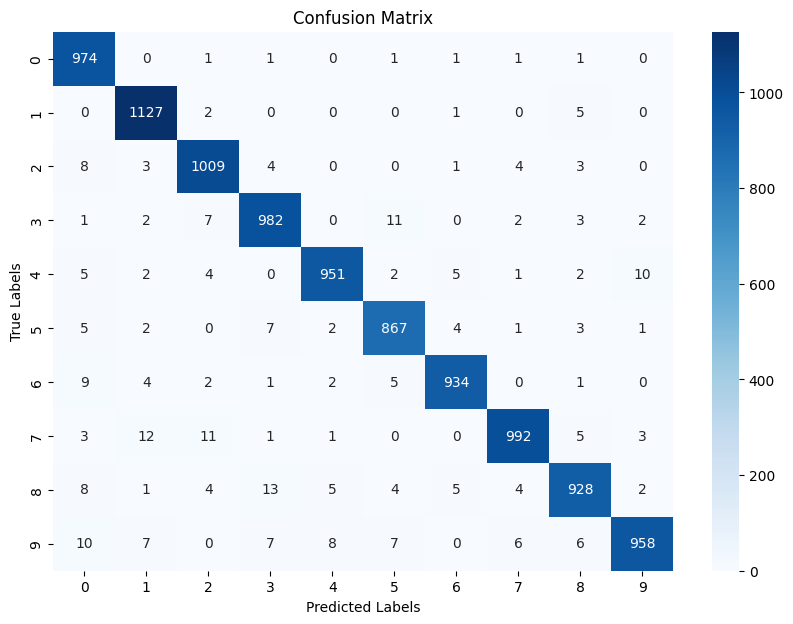

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the trained model
model.eval()
y_test = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)  # Flatten the images
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
        y_test.extend(labels.numpy())

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # `macro` average to treat all classes equally
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Test Accuracy: 0.9722
Precision: 0.9723
Recall: 0.9719
F1 Score: 0.9720


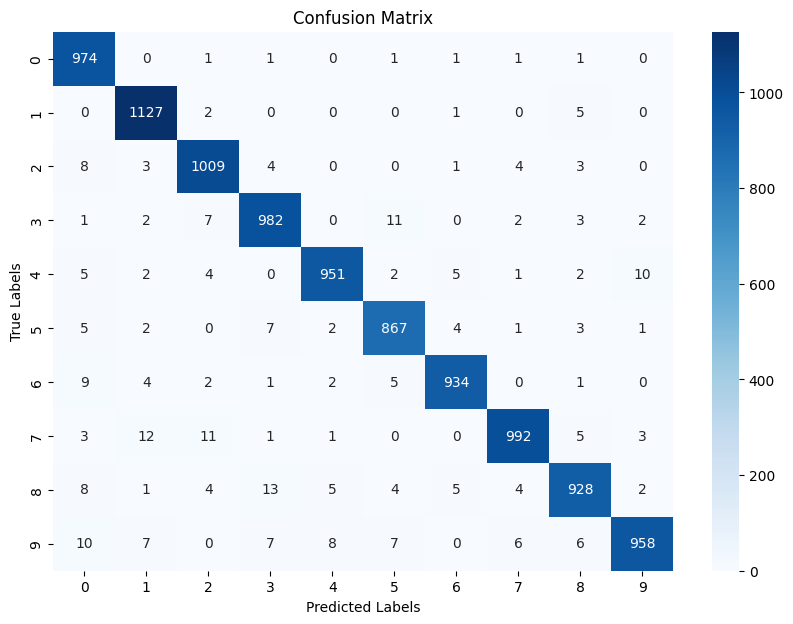

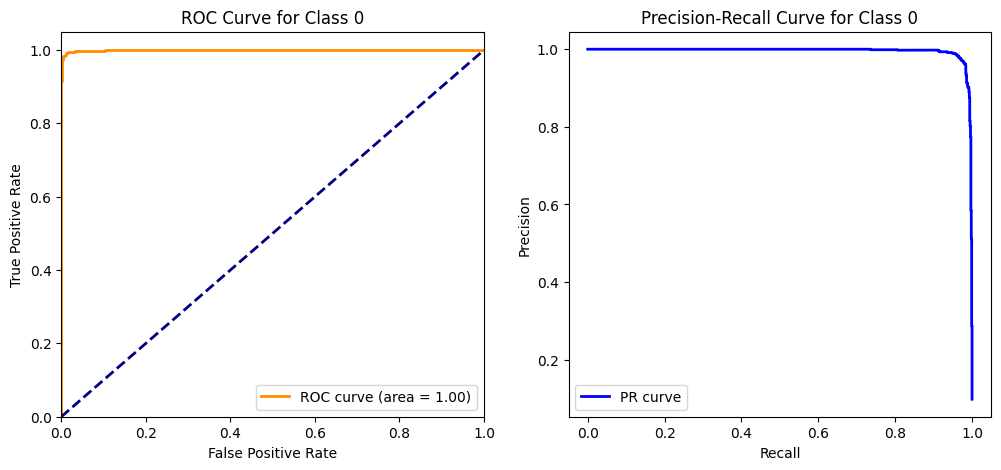

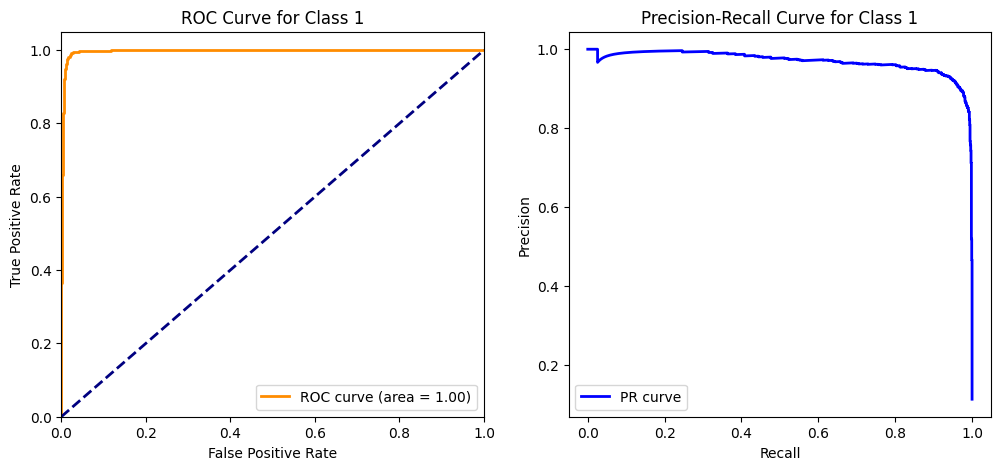

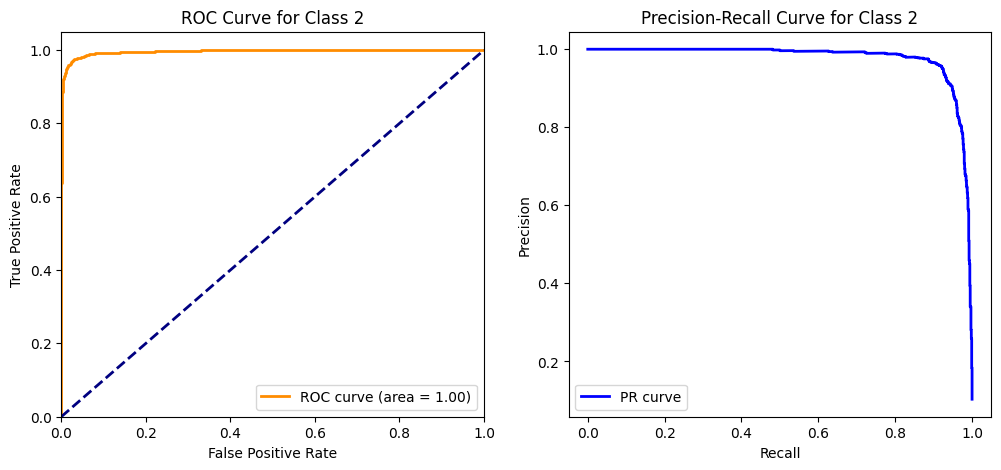

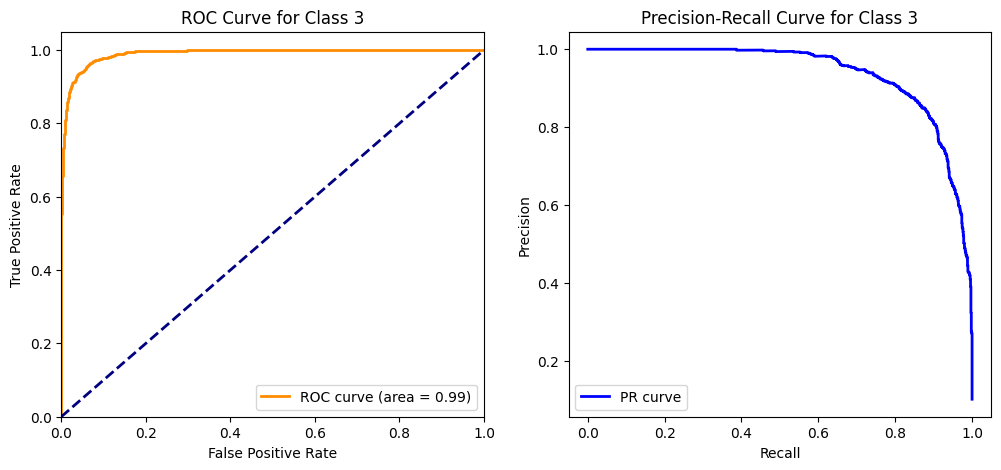

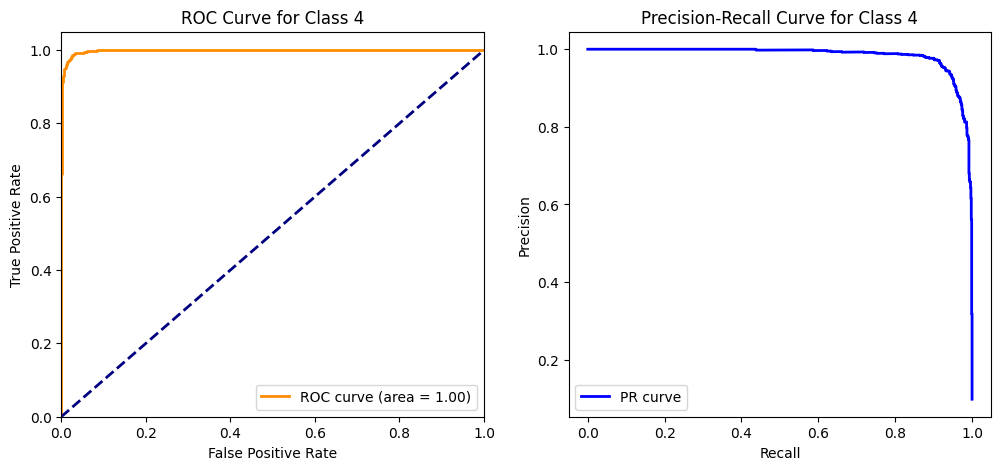

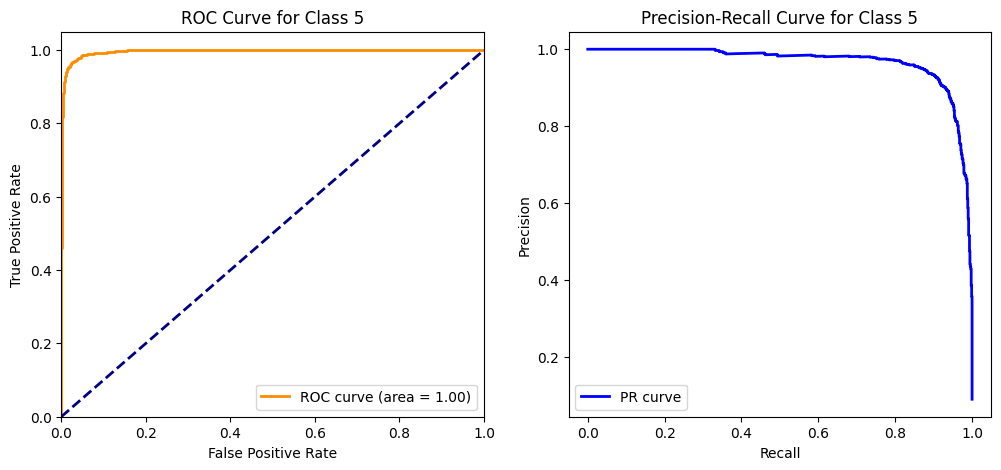

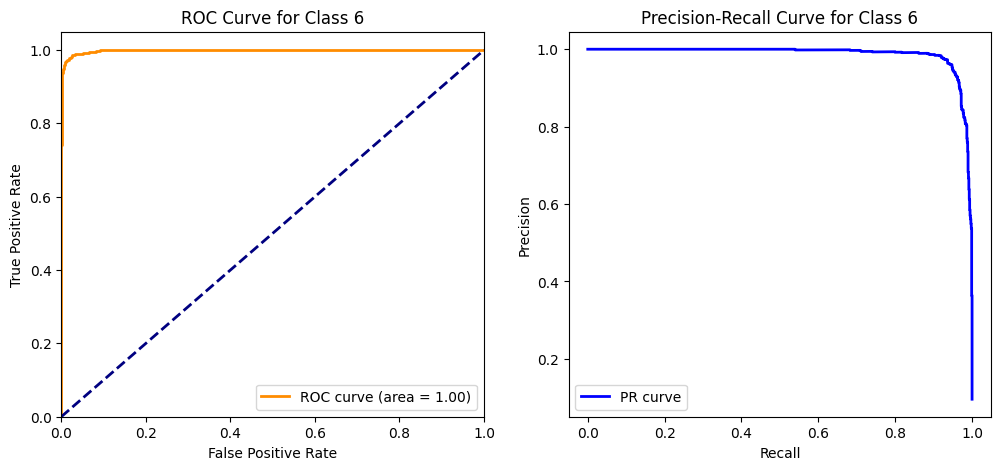

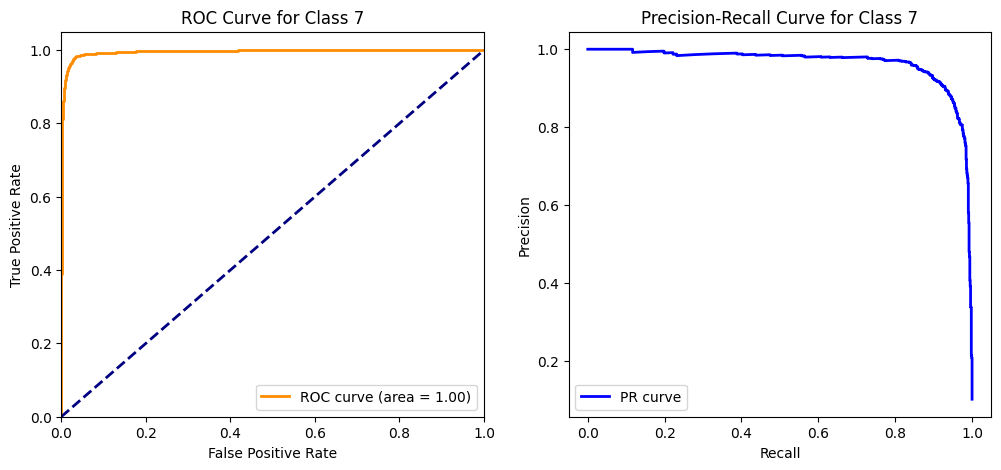

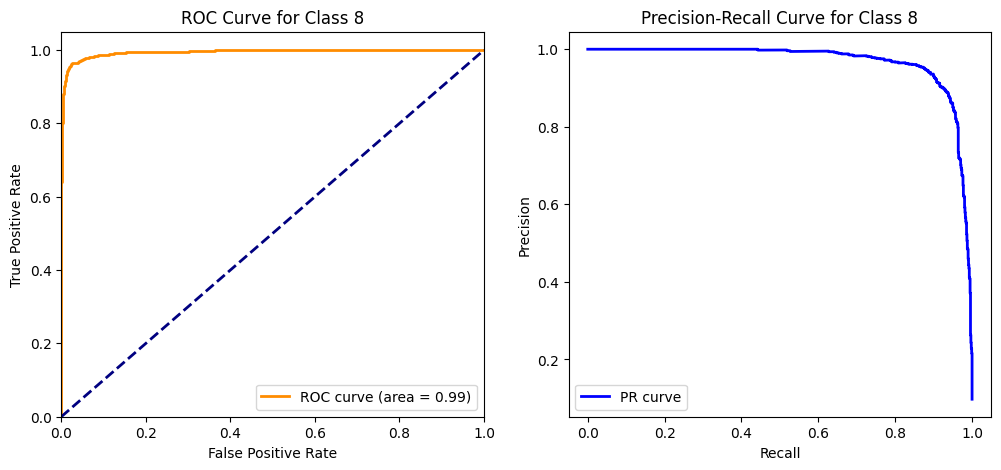

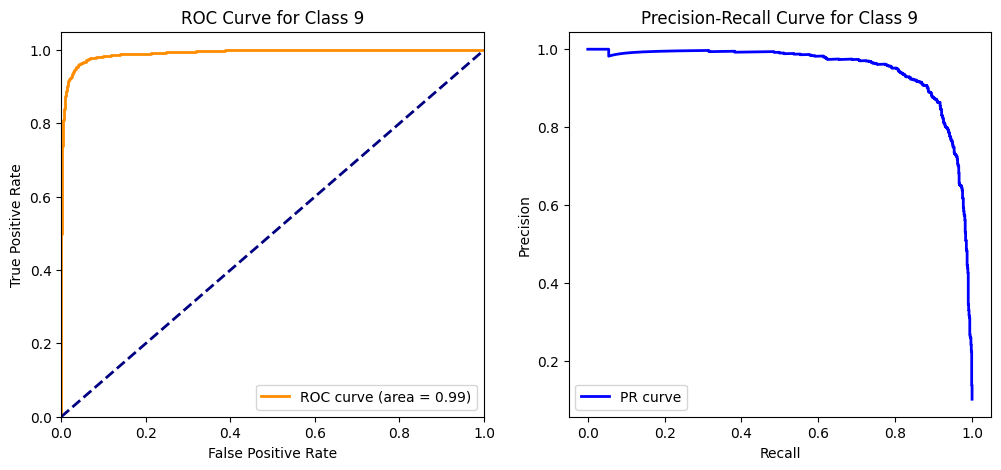

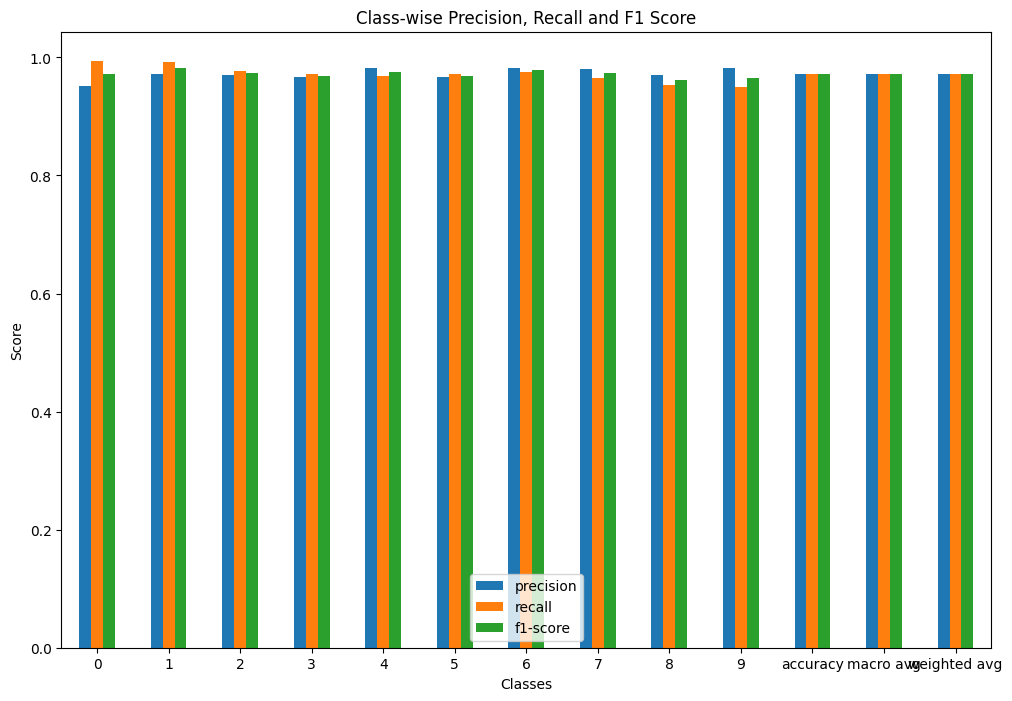

In [7]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report
import numpy as np
import torch
import pandas as pd

# Evaluate the trained model
model.eval()
y_test = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)  # Flatten the images
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
        y_test.extend(labels.numpy())
        y_scores.extend(outputs.numpy())

# Convert to numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # `macro` average to treat all classes equally
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plotting ROC Curve and Precision-Recall Curve for each class
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test == i, y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    precision, recall, _ = precision_recall_curve(y_test == i, y_scores[:, i])

    plt.figure(figsize=(12, 5))

    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {i}')
    plt.legend(loc="lower right")

    # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, lw=2, color='b', label=f'PR curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for Class {i}')
    plt.legend(loc="lower left")

    plt.show()

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
class_report = pd.DataFrame(report).transpose()

# Plotting class-wise precision, recall, and f1-score
class_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 8))
plt.title('Class-wise Precision, Recall and F1 Score')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


## Conclusion

Congratulations on completing this comprehensive lab on Multi-Layer Perceptrons (MLPs) using the MNIST dataset! Throughout this exercise, you've successfully:

1. Loaded and preprocessed the MNIST dataset using PyTorch and torchvision
2. Implemented a Multi-Layer Perceptron model using PyTorch's nn.Module
3. Set up the training process with a loss function (CrossEntropyLoss) and optimizer (Adam)
4. Trained the MLP model on the MNIST dataset
5. Evaluated the model's performance using various metrics:
   - Accuracy
   - Precision
   - Recall
   - F1 Score
6. Visualized the results using:
   - Confusion Matrix
   - ROC Curves
   - Precision-Recall Curves
   - Class-wise performance bar charts

Key takeaways from this lab:

- Understanding the structure and implementation of MLPs in PyTorch
- The importance of data preprocessing and normalization
- The process of training a neural network, including forward and backward passes
- The significance of various evaluation metrics in assessing model performance
- The value of visualizations in interpreting model results and identifying areas for improvement

This lab has provided you with hands-on experience in building, training, and evaluating a neural network for image classification. You've gained insights into the entire machine learning pipeline, from data preparation to model evaluation and result interpretation. These skills form a solid foundation for tackling more complex deep learning tasks and understanding more advanced neural network architectures.